***Dataset is taken from:***

https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?resource=download

***REFERENCES***

* https://machinelearningmastery.com/stacked-long-short-term-memory-networks/

* https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/

* https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

* https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/

### Multivariate MultiStep Time Series Forecasting Implementation

In [1]:
# import required libraries

# data preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest

# visualization
from matplotlib import pyplot as plt

# implementing deep learning model
import tensorflow as ts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import Adam

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
data_train = pd.read_csv("archive\DailyDelhiClimateTrain.csv")
data_test = pd.read_csv("archive\DailyDelhiClimateTest.csv")
print("Train Dataframe")
display(data_train.head())
print("Test Dataframe")
display(data_test.head())

Train Dataframe


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Test Dataframe


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [3]:
# set index of dataframe as date column
data_train.set_index("date",drop=True,inplace=True)
data_test.set_index("date",drop=True,inplace=True)

In [4]:
# dataframe info ---> no Nan values
print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5+ KB
None


In [5]:
# print the feature graphs
# plt.figure(figsize=(15,12))
# plt.subplot(4,1,1)
# plt.title("Mean temperature")
# plt.plot(data_train["meantemp"])

# plt.subplot(4,1,2)
# plt.title("Humidity")
# plt.plot(data_train["humidity"])

# plt.subplot(4,1,3)
# plt.title("Wind Speed")
# plt.plot(data_train["wind_speed"])

# plt.subplot(4,1,4)
# plt.title("Mean Pressure")
# plt.plot(data_train["meanpressure"])

# plt.show()

In [6]:
def scaled_transform(X,min_data, max_data, min_range=-1, max_range=1):
    X_std = (X-min_data)/(max_data-min_data)
    X_sc = X_std * (max_range - min_range) + (min_range)
    return np.array(X_sc)

In [7]:
# scale the data
# scaler_tr = MinMaxScaler(feature_range=(-1,1)).fit(data_train)
# data_tr_sc = scaler_tr.transform(data_train)

# scaler_ts = MinMaxScaler(feature_range=(-1,1)).fit(data_test)
# data_ts_sc = scaler_ts.transform(data_test)
data_tr_sc = pd.DataFrame()
data_ts_sc = pd.DataFrame()

tr0_min = data_train["meantemp"].values.min()
tr0_max = data_train["meantemp"].values.max()
tr1_min = data_train["humidity"].values.min()
tr1_max = data_train["humidity"].values.max()
tr2_min = data_train["wind_speed"].values.min()
tr2_max = data_train["wind_speed"].values.max()
tr3_min = data_train["meanpressure"].values.min()
tr3_max = data_train["meanpressure"].values.max()
print(tr3_min,tr3_max)


data_tr_sc["meantemp"] = scaled_transform(data_train["meantemp"].values,tr0_min,tr0_max)
data_tr_sc["humidity"] = scaled_transform(data_train["humidity"].values,tr1_min,tr1_max)
data_tr_sc["wind_speed"] = scaled_transform(data_train["wind_speed"].values,tr2_min,tr2_max)
data_tr_sc["meanpressure"] = scaled_transform(data_train["meanpressure"].values,tr3_min,tr3_max)

ts0_min = data_test["meantemp"].values.min()
ts0_max = data_test["meantemp"].values.max()
ts1_min = data_test["humidity"].values.min()
ts1_max = data_test["humidity"].values.max()
ts2_min = data_test["wind_speed"].values.min()
ts2_max = data_test["wind_speed"].values.max()
ts3_min = data_test["meanpressure"].values.min()
ts3_max = data_test["meanpressure"].values.max()

data_ts_sc["meantemp"] = scaled_transform(data_test["meantemp"].values,ts0_min,ts0_max)
data_ts_sc["humidity"] = scaled_transform(data_test["humidity"].values,ts1_min,ts1_max)
data_ts_sc["wind_speed"] = scaled_transform(data_test["wind_speed"].values,ts2_min,ts2_max)
data_ts_sc["meanpressure"] = scaled_transform(data_test["meanpressure"].values,ts3_min,ts3_max)

data_tr_sc = np.array(data_tr_sc) 
data_ts_sc = np.array(data_ts_sc) 

-3.0416666666666665 7679.333333333333


In [8]:
# display(data_tr_sc)
# display(data_ts_sc)

In [9]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [10]:
n_features = 4
n_months_in = 10
n_months_out = 2
X_train, y_train = split_sequences(data_tr_sc,n_months_in,n_months_out)
X_test, y_test = split_sequences(data_ts_sc,n_months_in,n_months_out)

In [11]:
# print(data_tr_sc[0:n_months_in+n_months_out,:])
# print("----------------------------------------------------")
# print(X_train[0,:])
# print("----------------------------------------------------")
# print(y_train[0,:])

In [12]:
# print(data_ts_sc[0:n_months_in+n_months_out,])
# print("----------------------------------------------------")
# print(X_test[0,])
# print("----------------------------------------------------")
# print( y_test[0,])

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1451, 10, 4)
(1451, 2, 4)
(103, 10, 4)
(103, 2, 4)


In [14]:
# reshape y values to 2D array
y_train = y_train.reshape(y_train.shape[0],n_months_out*n_features)
y_test = y_test.reshape(y_test.shape[0],n_months_out*n_features)
print(y_train.shape)
print(y_test.shape)

(1451, 8)
(103, 8)


In [15]:
# build LSTM model
batch_size = 1
# unit = 50-100-50 || dropout = 0.2-0.2 || epoch = 250 || val_split = 0.2
model = Sequential()
model.add(LSTM(32,return_sequences=True,batch_input_shape=(batch_size,n_months_in,n_features),kernel_constraint=MaxNorm(3),stateful=True))
model.add(Dropout(0.4)) # 20% neurons dropped out
model.add(LSTM(64,return_sequences=False,kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.4))
# model.add(LSTM(32))
# model.add(Dropout(0.3))
model.add(Dense(n_months_out*n_features))
model.compile(optimizer=Adam(learning_rate = 0.0000001), loss="mse")

In [25]:
# train the model 
epochs = 250
validation_split = 0.3 # 20% validation set
train_loss = []
val_loss = []
for i in range(epochs):
    history = model.fit(x=X_train, y=y_train, epochs=1, batch_size=batch_size, verbose=2,validation_split=validation_split,shuffle=False)
    train_loss.append(history.history["loss"])
    val_loss.append(history.history["val_loss"])
    model.reset_states()

    

1015/1015 - 12s - loss: 0.1153 - val_loss: 0.0826 - 12s/epoch - 12ms/step
1015/1015 - 13s - loss: 0.1145 - val_loss: 0.0824 - 13s/epoch - 12ms/step
1015/1015 - 12s - loss: 0.1141 - val_loss: 0.0821 - 12s/epoch - 12ms/step
1015/1015 - 13s - loss: 0.1144 - val_loss: 0.0819 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.1129 - val_loss: 0.0817 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.1130 - val_loss: 0.0814 - 13s/epoch - 12ms/step
1015/1015 - 13s - loss: 0.1114 - val_loss: 0.0812 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.1106 - val_loss: 0.0810 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.1126 - val_loss: 0.0807 - 13s/epoch - 12ms/step
1015/1015 - 13s - loss: 0.1134 - val_loss: 0.0805 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.1119 - val_loss: 0.0803 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.1116 - val_loss: 0.0801 - 13s/epoch - 12ms/step
1015/1015 - 13s - loss: 0.1106 - val_loss: 0.0798 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.1110 - val_l

1015/1015 - 13s - loss: 0.0944 - val_loss: 0.0637 - 13s/epoch - 13ms/step
1015/1015 - 12s - loss: 0.0955 - val_loss: 0.0636 - 12s/epoch - 12ms/step
1015/1015 - 13s - loss: 0.0950 - val_loss: 0.0634 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0941 - val_loss: 0.0633 - 13s/epoch - 12ms/step
1015/1015 - 13s - loss: 0.0932 - val_loss: 0.0631 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0949 - val_loss: 0.0630 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0952 - val_loss: 0.0629 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0956 - val_loss: 0.0627 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0938 - val_loss: 0.0626 - 13s/epoch - 12ms/step
1015/1015 - 13s - loss: 0.0930 - val_loss: 0.0625 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0928 - val_loss: 0.0624 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0912 - val_loss: 0.0622 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0938 - val_loss: 0.0621 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0931 - val_l

1015/1015 - 13s - loss: 0.0827 - val_loss: 0.0511 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0825 - val_loss: 0.0510 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0800 - val_loss: 0.0509 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0807 - val_loss: 0.0508 - 13s/epoch - 13ms/step
1015/1015 - 12s - loss: 0.0828 - val_loss: 0.0508 - 12s/epoch - 12ms/step
1015/1015 - 12s - loss: 0.0828 - val_loss: 0.0507 - 12s/epoch - 12ms/step
1015/1015 - 12s - loss: 0.0824 - val_loss: 0.0506 - 12s/epoch - 12ms/step
1015/1015 - 12s - loss: 0.0811 - val_loss: 0.0505 - 12s/epoch - 12ms/step
1015/1015 - 13s - loss: 0.0799 - val_loss: 0.0504 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0809 - val_loss: 0.0504 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0818 - val_loss: 0.0503 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0800 - val_loss: 0.0502 - 13s/epoch - 13ms/step
1015/1015 - 13s - loss: 0.0801 - val_loss: 0.0501 - 13s/epoch - 13ms/step
1015/1015 - 12s - loss: 0.0794 - val_l

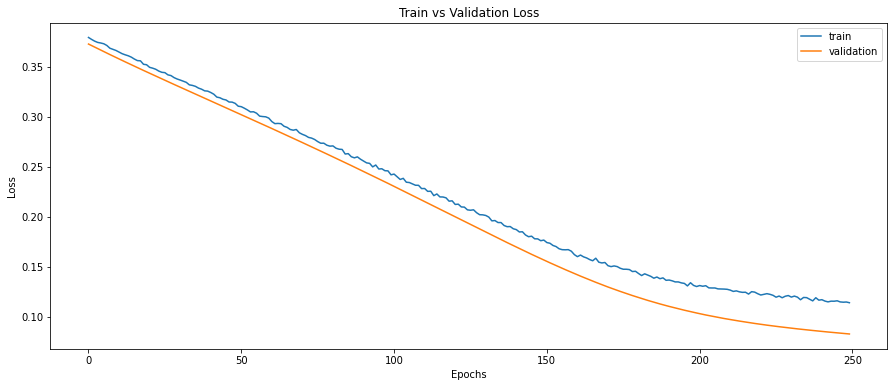

In [17]:
# plot the validation and training loss
plt.figure(figsize=(15,6))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Train vs Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [18]:
# prediction step
y_pred = np.zeros((y_test.shape[0],y_test.shape[1]))
X_test_model = np.zeros((X_test[0].shape[0],X_test[0].shape[1]))
for i in range(X_test[0].shape[0]):
    for j in range(X_test[0].shape[1]):
        X_test_model[i][j] = X_test[0][i][j]

In [19]:
for i in range(X_test.shape[0]):
#     print("Before\n")
#     print(X_test_model)
    X_test_model = X_test_model.reshape(1,n_months_in,n_features)
    pred = model.predict(X_test_model, verbose=0)
    X_test_model.reshape(n_months_in,n_features)
#     print("Predicted\n")
#     print(pred)
#     print("Actual")
#     print(y_test[i])
    y_pred[i]=pred
#     print("-------------")
#     print(X_test_model[0,-1])
#     print(pred[0,0:n_features])
#     print("-------------")

    X_test_model[0,:-n_months_in] = X_test_model[0,n_months_in:]
    X_test_model[0,-n_months_in] = pred[0,0:n_features]
#     print("After")
#     print(X_test_model)
    


In [20]:
def inverse_transform(X_scaled,min_data,max_data,min_range=-1,max_range=1):
    X_std = (X_scaled - (min_range))/(max_range-min_range)
    X = X_std * (max_data - min_data) + min_data
    return X

In [21]:
y_pred_inv = np.zeros((y_test.shape[0],y_test.shape[1]))
y_test_inv = np.zeros((y_test.shape[0],y_test.shape[1]))

y_test_inv[:,0] = inverse_transform(y_test[:,0],ts0_min,ts0_max)
y_pred_inv[:,0] = inverse_transform(y_pred[:,0],ts0_min,ts0_max)
y_test_inv[:,1] = inverse_transform(y_test[:,1],ts1_min,ts1_max)
y_pred_inv[:,1] = inverse_transform(y_pred[:,1],ts1_min,ts1_max)
y_test_inv[:,2] = inverse_transform(y_test[:,2],ts2_min,ts2_max)
y_pred_inv[:,2] = inverse_transform(y_pred[:,2],ts2_min,ts2_max)
y_test_inv[:,3] = inverse_transform(y_test[:,3],ts3_min,ts3_max)
y_pred_inv[:,3] = inverse_transform(y_pred[:,3],ts3_min,ts3_max)


rmse = mean_squared_error(y_test_inv, y_pred_inv) ** (0.5)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 164.759


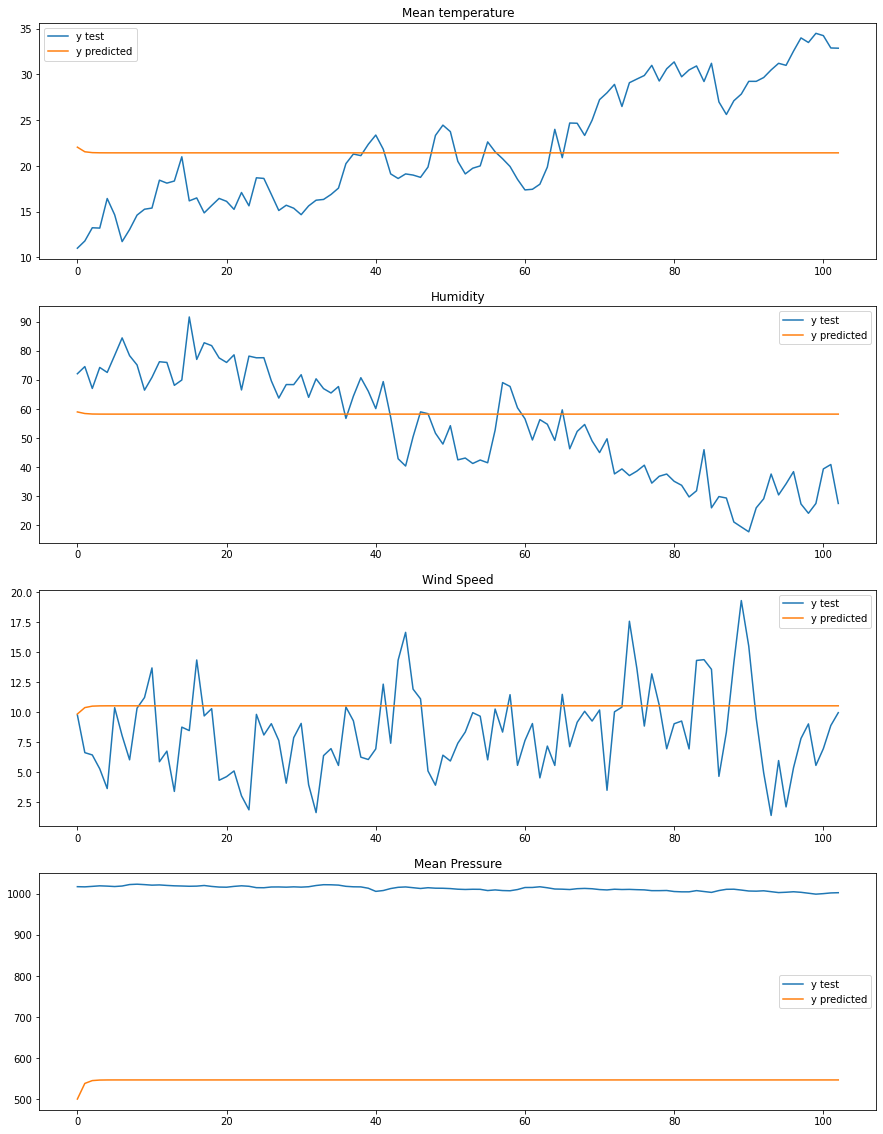

In [22]:
plt.figure(figsize=(15,5*4))

plt.subplot(4,1,1)
plt.title("Mean temperature")
plt.plot(y_test_inv[:,0])
plt.plot(y_pred_inv[:,0])
plt.legend(["y test","y predicted"])

plt.subplot(4,1,2)
plt.title("Humidity")
plt.plot(y_test_inv[:,1])
plt.plot(y_pred_inv[:,1])
plt.legend(["y test","y predicted"])

plt.subplot(4,1,3)
plt.title("Wind Speed")
plt.plot(y_test_inv[:,2])
plt.plot(y_pred_inv[:,2])
plt.legend(["y test","y predicted"])

plt.subplot(4,1,4)
plt.title("Mean Pressure")
plt.plot(y_test_inv[:,3])
plt.plot(y_pred_inv[:,3])
plt.legend(["y test","y predicted"])

plt.show()

In [23]:
# print(y_test_inv[:,3])
# print(y_pred_inv[:,3])

In [24]:
# print(y_test[:,3])
# print(y_pred[:,3])